# **Problem Statement:**<br> 
Consider the MNIST dataset and the classification model from the previous lesson for image classification. Now to increase the model accuracy, the training data must be increased. Apply the concept of RBM as they are also known for their ability to reconstruct images.

## **Objective:**<br> 
Apply scikit's RBM to MNIST to generate some new images with Gibbs sampling.

### **Solution:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray' #gray scaling plot parameters

import pandas as pd

In [2]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [3]:
X_train = pd.read_csv('train (1).csv').values[:,1:]
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling - normalizing

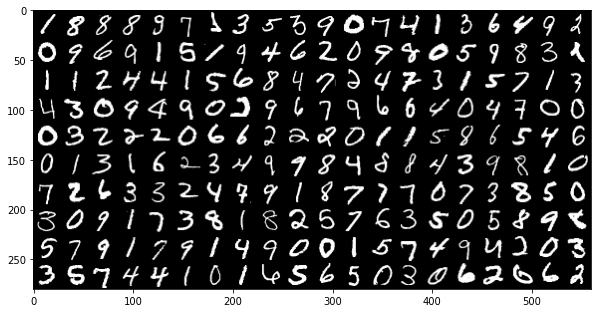

In [4]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(X_train))

In [5]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True) #Bernoulli RBM 
rbm.fit(X_train) #to train the data

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.88, time = 7.96s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.69, time = 9.25s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.89, time = 9.22s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -93.39, time = 9.23s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -91.08, time = 9.18s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -87.70, time = 9.21s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.29, time = 9.23s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.49, time = 9.25s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.12, time = 9.21s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -83.32, time = 9.12s


BernoulliRBM(batch_size=10, learning_rate=0.01, n_components=100, n_iter=10,
             random_state=0, verbose=True)

In [6]:
xx = X_train[:40].copy() # upto 40 imagings to find energy state (stochastic model)
for ii in range(1000): # 1000 iterations
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n]) #gibbs - sampling -standard mechanism to handle such inferences

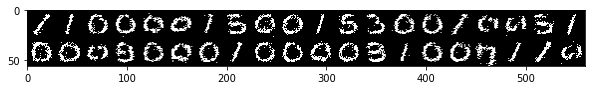

In [7]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

In [8]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

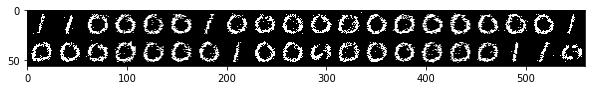

In [9]:
plt.figure(figsize=(10,20))
plt.imshow(gen_mnist_image(xx))

Text(0.5, 0.98, '100 components extracted by RBM')

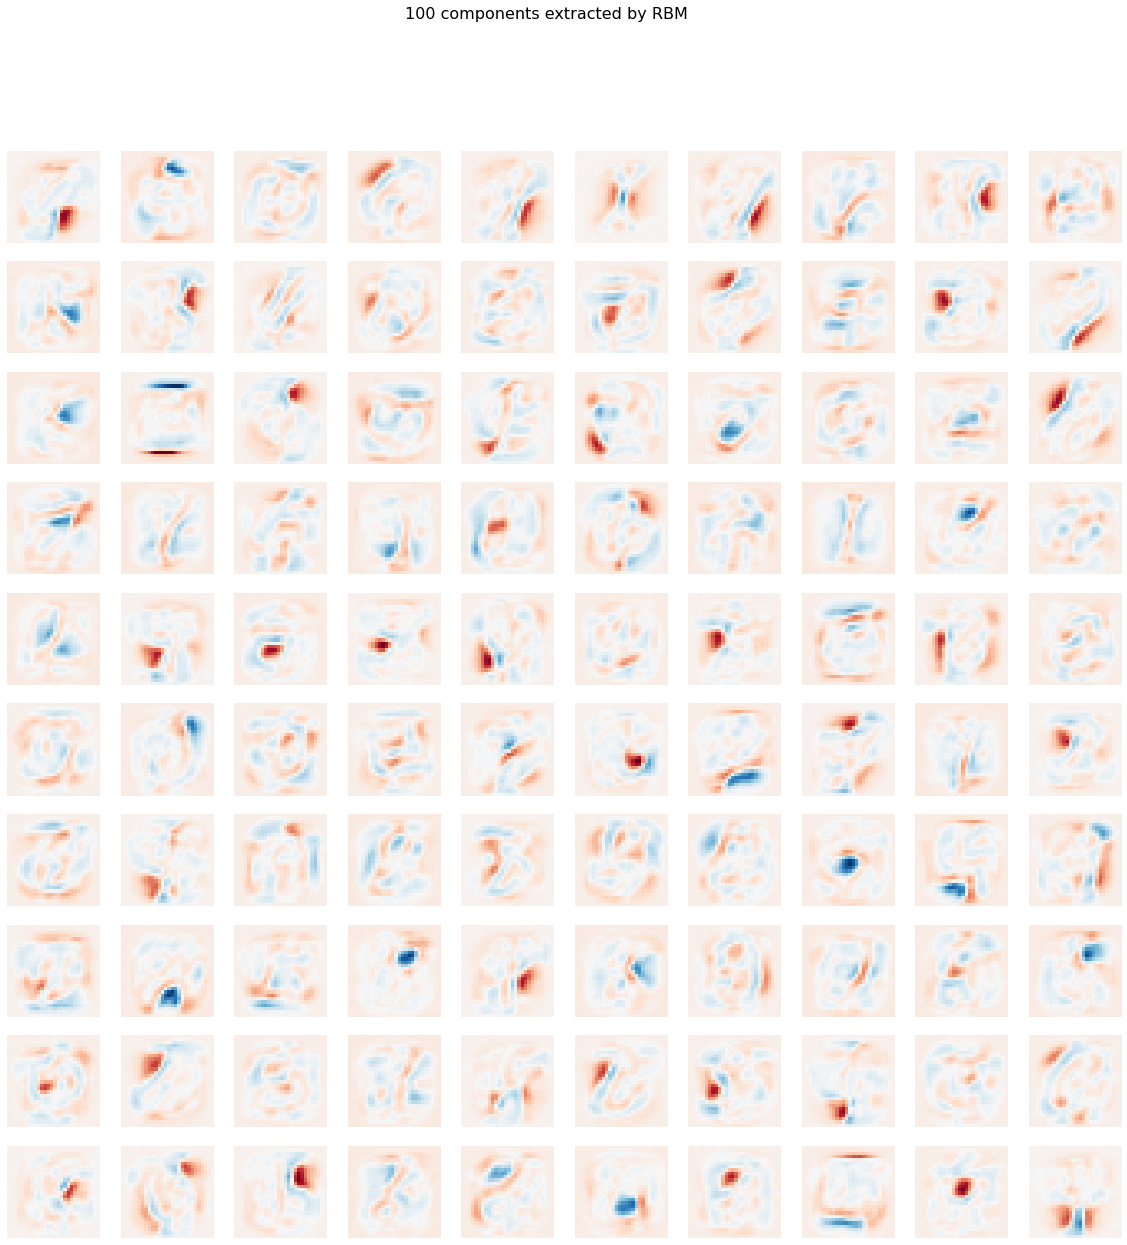

In [10]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.suptitle('100 components extracted by RBM', fontsize=16)

Latent variables - components reconsrtucted or extracted by RBM